In [1]:
from spice_segmenter.trajectory_properties import Distance,PhaseAngle
from spice_segmenter.occultation import Occultation, OccultationTypes
from spice_segmenter.coordinates import Vector
from matplotlib import pyplot as plt

from planetary_coverage import TourConfig, SpiceRef
import tempfile
from pathlib import Path
import spiceypy 

In [2]:
from quick_setup import config, traj

[Download] https://spiftp.esac.esa.int/data/SPICE/JUICE/kernels//spk/juice_orbc_000035_230414_310721_v02.bsp
[Download] https://spiftp.esac.esa.int/data/SPICE/JUICE/kernels//spk/juice_cog_000035_230416_230513_v02.bsp
[Download] https://spiftp.esac.esa.int/data/SPICE/JUICE/kernels//ck/juice_sc_attc_000035_230414_230527_v02.bc


In [3]:
io_juice = Vector("JUICE", "IO", SpiceRef("IO").frame, abcorr="LT+S") # a vector
io_juice

Vector from JUICE to IO in frame IAU_IO

In [4]:
t = traj.ets[100]

io_juice(t) # get the vector value

array([ 3.34481854e+08,  7.07726599e+08, -4.29266408e+07])

In [5]:
io_juice.x(t) # get the x component

array(3.34481854e+08)

In [6]:
io_juice.y(t) # get the x component

array(7.07726599e+08)

In [7]:
io_juice.z(t) # get the x component

array(-42926640.8448914)

In [8]:
# get in a different coordinate type

latitudinal = io_juice.as_latitudinal

In [9]:
latitudinal(t)


array([ 7.83962848e+08,  1.12929614e+00, -5.47833619e-02])

In [10]:
latitudinal.latitude(t)

array(-0.05478336)

In [11]:
#create a constraint -> only scalars properties can be used:
c = (latitudinal.latitude > "-0.1 deg") & (latitudinal.latitude < "0.1 deg") # find when juice is in the equatorial plane of IO
c

((latitude > -0.1 degree) & (latitude < 0.1 degree))

In [12]:
from spice_segmenter.spice_window import SpiceWindow


w = SpiceWindow()
w.add_interval(*config.coverage)

In [13]:
result = c.solve(w)

Coordinate pass 1 of 2:   0%|          | 0/100 [00:00<?, ?%/s]

Coordinate pass 2 of 2:   0%|          | 0/100 [00:00<?, ?%/s]

Coordinate pass 1 of 2:   0%|          | 0/100 [00:00<?, ?%/s]

Coordinate pass 2 of 2:   0%|          | 0/100 [00:00<?, ?%/s]

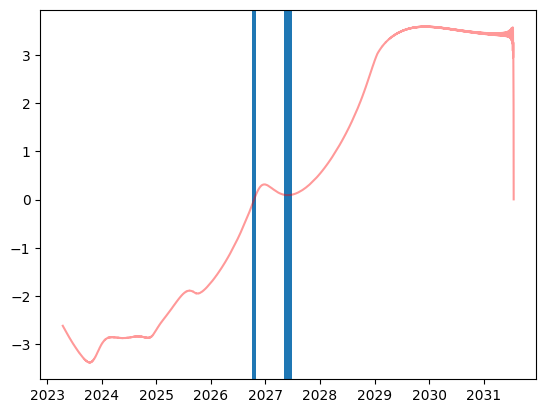

In [14]:
import matplotlib.pyplot as plt

latitude_deg = latitudinal.latitude.as_unit("deg")

values = latitude_deg(traj.ets)
result.plot()

plt.plot(traj.utc, values, label="latitude", alpha=0.4, color="red")

In [15]:
result.to_datetimerange() # the intervals

[2026-10-05T01:13:28+0000 - 2026-10-29T04:55:14+0000,
 2027-05-04T22:41:30+0000 - 2027-06-25T10:02:32+0000,
 2031-07-21T05:14:40+0000 - 2031-07-21T06:03:12+0000]